## Дисциплина: Спецглавы высшей математики
## Задание: ПЗ-Градиенты
## Студенты: Сатин И.А., Багаутдинова Л.И.
## Вариант 8 -> $x^3 + y^3$

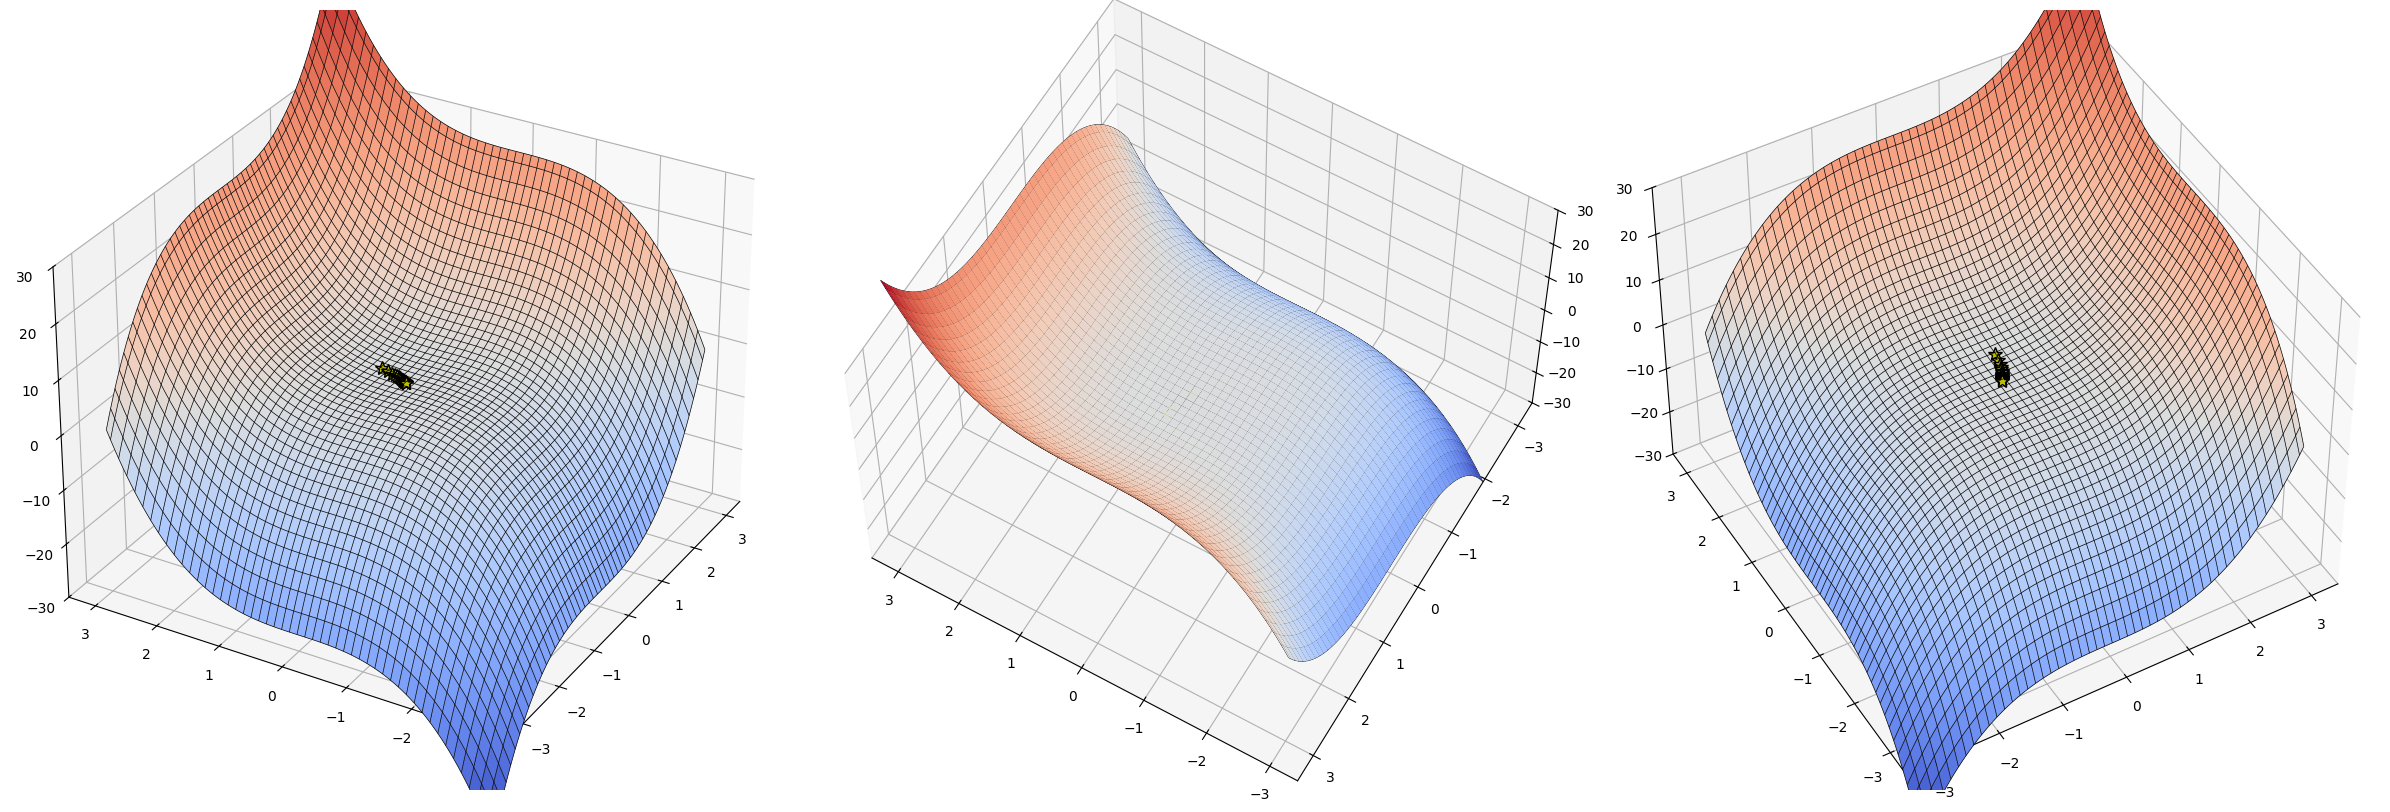

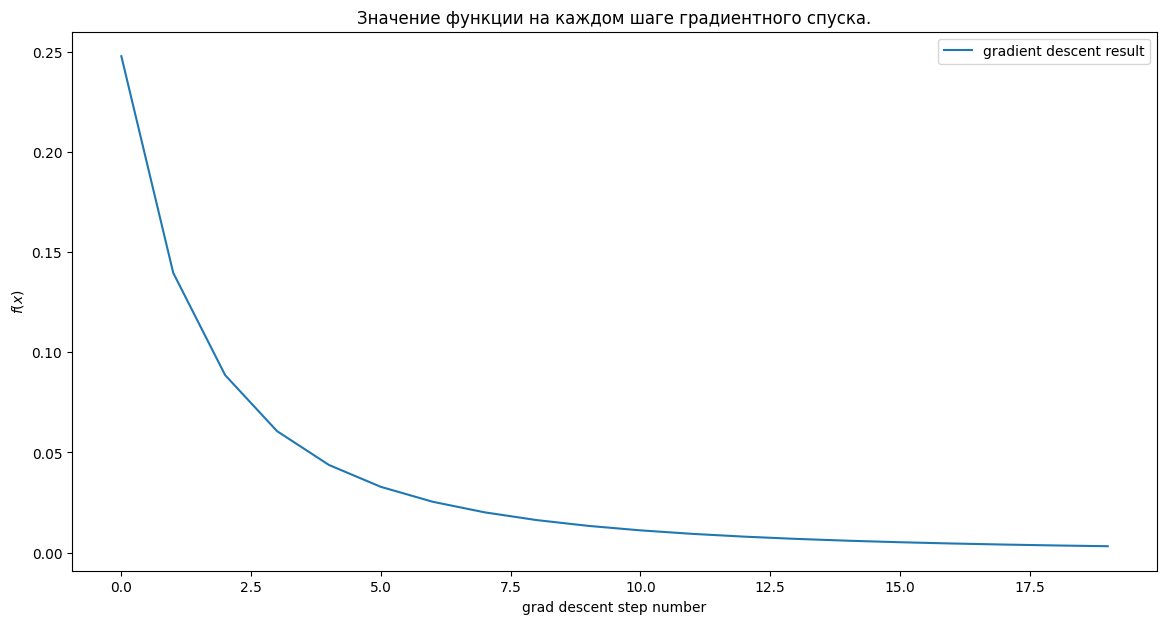

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def f(x):
    """
    :param x: np.array(np.float) вектор длины 2
    :return: np.float
    """
    return np.sum(x**3)

def grad_f(x):
    """
    Градиент функции f, определенной выше.
    :param x: np.array[2]: float вектор длины 2
    :return: np.array[2]: float вектор длины 2
    """
    return 3 * x**2  # Градиент для функции x^3 + y^3

def grad_descent_2d(f, grad_f, lr, num_iter=100, x0=None):
    """
    Функция, которая реализует градиентный спуск в минимум для функции f от двух переменных.
        :param f: скалярная функция двух переменных
        :param grad_f: градиент функции f (вектор размерности 2)
        :param lr: learning rate алгоритма
        :param num_iter: количество итераций градиентного спуска
        :return: np.array[num_iter, 2] пар вида (x, f(x))
    """
    if x0 is None:
        x0 = np.random.random(2)

    history = []
    curr_x = x0.copy()
    
    for iter_num in range(num_iter):
        entry = np.hstack((curr_x, f(curr_x)))
        history.append(entry)
        curr_x -= lr * grad_f(curr_x)

    return np.vstack(history)

steps = grad_descent_2d(f, grad_f, lr=0.1, num_iter=20)

# Визуализация поверхности функции и пути градиентного спуска
X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

fig = plt.figure(figsize=(24, 10))  # Увеличенный размер графиков

# Углы обзора для разных графиков
view_angles = [(30, 210), (60, 120), (45, 240)]

for i, (elev, azim) in enumerate(view_angles):
    ax = fig.add_subplot(1, len(view_angles), i + 1, projection='3d')
    
    zs = np.array([f(np.array([x,y])) for x, y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)

    # Используем прежнюю цветовую карту
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, zorder=2)

    # Добавление контрастной сетки на поверхность
    ax.plot_wireframe(X, Y, Z, color='k', linewidth=0.5)  # Черная сетка

    # Отображение пути градиентного спуска
    ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2],
            marker='*', markersize=10, zorder=3,
            markerfacecolor='y', lw=3, c='black')

    ax.set_zlim(-30, 30)
    ax.view_init(elev=elev, azim=azim)  # Угол обзора для каждой подграфики

plt.tight_layout()  # Уплотнение графиков для лучшей компоновки
plt.show()

plt.figure(figsize=(14,7))
plt.xlabel('grad descent step number')
plt.ylabel('$f(x)$')
plt.title('Значение функции на каждом шаге градиентного спуска.')

f_values = list(map(lambda x: x[2], steps))
plt.plot(f_values, label='gradient descent result')
plt.legend()
plt.show()